In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('scaled_data.csv')

In [3]:
df

,Unnamed: 0,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,total_spent,parent,total_accepted_coupons,number_of_total_purchases
0,0,-0.89438,1.347635,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,...,-0.279482,-0.262362,-0.116616,-0.095001,2.386338,1.016868,1.680176,-1.264308,-0.438933,1.319340
1,1,-0.89438,1.347635,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.273264,-0.962202,1.395139,-0.438933,-1.155857
2,2,-0.89438,-0.742041,0.917992,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.333146,0.282541,-1.264308,-0.438933,0.798246
3,3,-0.89438,-0.742041,-1.182621,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.290693,-0.918994,0.065416,-0.438933,-0.895310
4,4,0.57070,-0.742041,0.295754,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,-0.305762,0.065416,-0.438933,0.537699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2231,-0.89438,-0.742041,0.432628,-0.824939,0.905974,-0.107640,1.203128,0.421101,0.066551,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.162216,1.221499,0.065416,-0.438933,0.407425
2232,2232,0.57070,-0.742041,0.563008,2.890194,0.905974,0.237773,0.302727,-0.661610,-0.607091,...,-0.279482,3.811532,-0.116616,-0.095001,-0.419052,1.956986,-0.269201,2.724862,1.034721,0.928519
2233,2233,-0.89438,1.347635,0.234465,-0.824939,-0.930615,1.446720,1.794481,0.546997,0.221666,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,1.055312,-1.264308,1.034721,0.537699
2234,2234,0.57070,-0.742041,0.807372,-0.824939,0.905974,-1.420212,0.368102,0.093769,0.208371,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.102333,0.393886,0.065416,-0.438933,1.058793


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,total_spent,parent,total_accepted_coupons,number_of_total_purchases
0,-0.89438,1.347635,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,...,-0.279482,-0.262362,-0.116616,-0.095001,2.386338,1.016868,1.680176,-1.264308,-0.438933,1.319340
1,-0.89438,1.347635,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,...,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.273264,-0.962202,1.395139,-0.438933,-1.155857


In [6]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'total_spent', 'parent',
       'total_accepted_coupons', 'number_of_total_purchases'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  2236 non-null   float64
 1   Marital_Status             2236 non-null   float64
 2   Income                     2236 non-null   float64
 3   Kidhome                    2236 non-null   float64
 4   Teenhome                   2236 non-null   float64
 5   Recency                    2236 non-null   float64
 6   MntWines                   2236 non-null   float64
 7   MntFruits                  2236 non-null   float64
 8   MntMeatProducts            2236 non-null   float64
 9   MntFishProducts            2236 non-null   float64
 10  MntSweetProducts           2236 non-null   float64
 11  MntGoldProds               2236 non-null   float64
 12  NumDealsPurchases          2236 non-null   float64
 13  NumWebPurchases            2236 non-null   float

In [8]:
df.shape

(2236, 29)

## Dimension Reductionality

In [9]:
pca=PCA()

In [10]:
pca.fit(df)

PCA()

In [11]:
(pca.explained_variance_ratio_).cumsum()*100

array([ 30.39622243,  39.59505166,  48.10199239,  53.12464104,
        57.03673847,  60.90148152,  64.47225184,  67.95344141,
        71.37723133,  74.65054023,  77.4294795 ,  80.09390238,
        82.50593483,  84.63876774,  86.74731614,  88.72255695,
        90.50674774,  92.13046797,  93.67012469,  95.17856597,
        96.49272212,  97.68735346,  98.58488332,  99.38264612,
       100.        , 100.        , 100.        , 100.        ,
       100.        ])

Taking n_components as 12 because we can cover 80% of the data.

In [12]:
pca = PCA(n_components=12, random_state=42)

In [13]:
pca.fit(df)

PCA(n_components=12, random_state=42)

In [14]:
pca_df= pd.DataFrame(pca.transform(df))

In [15]:
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.350201,-0.736941,-0.995048,2.267260,0.822102,0.122471,-1.797852,-0.101577,-0.264118,-0.218586,-0.610586,-0.321235
1,-3.012965,-0.221387,0.295453,-0.907452,1.016507,1.846077,-1.023929,0.504301,-0.873574,-0.328742,0.185846,0.130560
2,1.932750,-0.772437,-1.377870,-0.233072,0.273937,-0.806330,0.084117,0.370538,0.275929,1.757354,-0.256325,-0.217724
3,-2.843499,1.046119,-0.816270,0.444337,-0.901317,-0.344420,0.064064,0.934137,-0.273343,1.141146,-0.041514,0.415298
4,-0.434741,-0.676470,-0.457006,0.615745,-2.179768,-0.705192,0.414749,-0.332764,0.071527,-0.981312,0.088613,0.429779
...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2.461477,-2.051202,-0.203649,0.849126,-0.303749,0.493520,0.016093,-0.837298,-0.046875,1.840878,0.268887,-1.690961
2232,-0.951169,-1.503619,4.197275,0.178130,-1.375891,1.382735,1.519800,1.145286,-1.033396,-1.666879,-0.874076,-1.610243
2233,2.298818,1.112451,0.475870,-1.550903,-1.240579,-1.772947,-2.626413,-0.762795,0.404945,-0.040918,-0.637490,0.710385
2234,1.832451,-1.937730,-0.224466,-0.746499,1.318552,-0.256972,1.287236,0.719100,0.000329,0.441280,0.444791,0.085500


## K-means

In [16]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_df)
    Sum_of_squared_distances.append(km.inertia_)

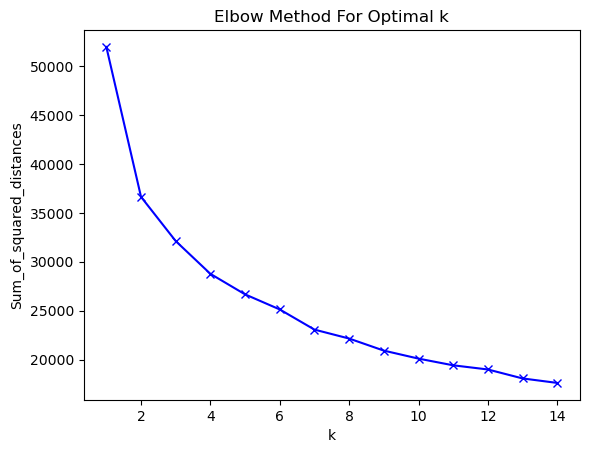

In [17]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [18]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Clusters'] = kmeans.fit_predict(pca_df)

<AxesSubplot:>

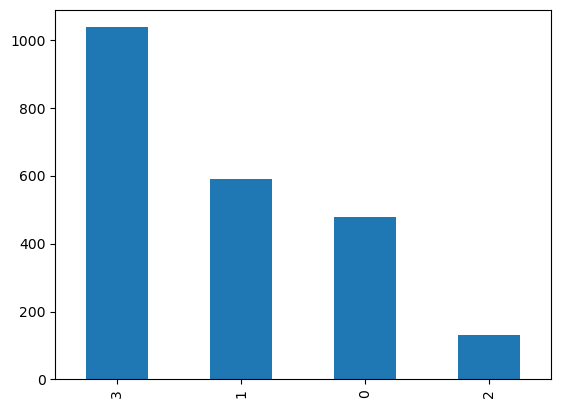

In [19]:
df.Clusters.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='total_spent', ylabel='Income'>

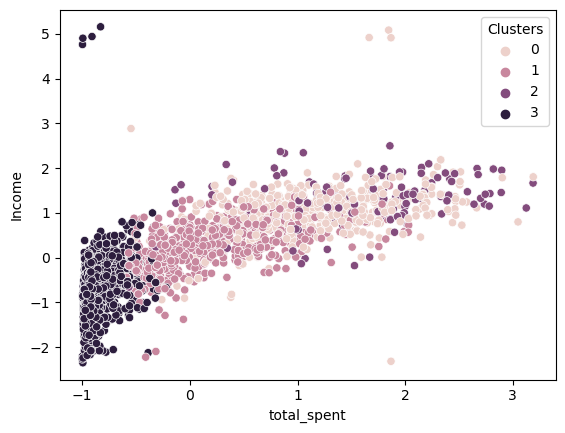

In [20]:
sns.scatterplot(x=df.total_spent, y=df.Income, hue=df.Clusters, data=df)

<AxesSubplot:xlabel='total_accepted_coupons', ylabel='count'>

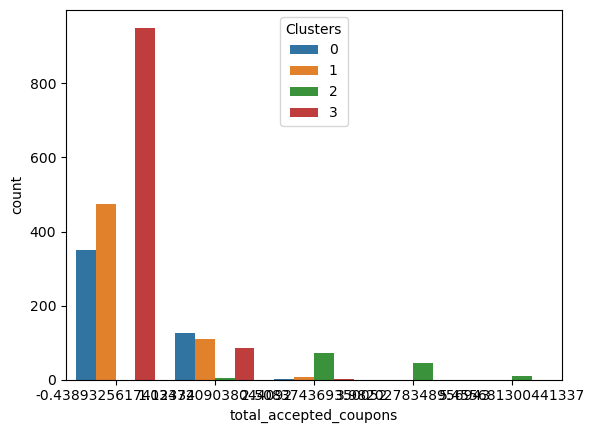

In [21]:
sns.countplot(x=df.total_accepted_coupons, hue=df.Clusters, data=df)

In [22]:
data= pd.read_csv('not_scaled_data.csv')

In [23]:
data

,Unnamed: 0,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,total_spent,parent,total_accepted_coupons,number_of_total_purchases
0,0,Graduate,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,1,66,1617,0,0,25
1,1,Graduate,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,69,27,2,0,6
2,2,Graduate,In Relationship,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,58,776,0,0,21
3,3,Graduate,In Relationship,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,39,53,1,0,8
4,4,Post Graduate,In Relationship,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,42,422,1,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2235,Graduate,In Relationship,61223.0,0,1,46,709,43,182,...,0,0,0,0,0,56,1341,1,0,18
2232,2236,Post Graduate,In Relationship,64014.0,2,1,56,406,0,30,...,0,1,0,0,0,77,444,3,1,22
2233,2237,Graduate,Single,56981.0,0,0,91,908,48,217,...,0,0,0,0,0,42,1241,0,1,19
2234,2238,Post Graduate,In Relationship,69245.0,0,1,8,428,30,214,...,0,0,0,0,0,67,843,1,0,23


In [24]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [25]:
data.isnull().sum()

Education                    0
Marital_Status               0
Income                       0
Kidhome                      0
Teenhome                     0
Recency                      0
MntWines                     0
MntFruits                    0
MntMeatProducts              0
MntFishProducts              0
MntSweetProducts             0
MntGoldProds                 0
NumDealsPurchases            0
NumWebPurchases              0
NumCatalogPurchases          0
NumStorePurchases            0
NumWebVisitsMonth            0
AcceptedCmp3                 0
AcceptedCmp4                 0
AcceptedCmp5                 0
AcceptedCmp1                 0
AcceptedCmp2                 0
Complain                     0
Response                     0
Age                          0
total_spent                  0
parent                       0
total_accepted_coupons       0
number_of_total_purchases    0
dtype: int64

In [26]:
data['Clusters'] = kmeans.fit_predict(pca_df)

<AxesSubplot:>

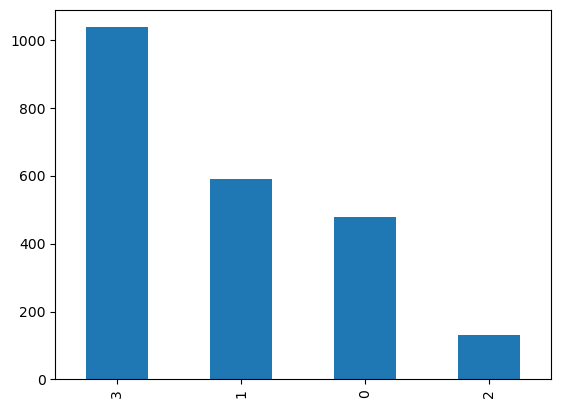

In [27]:
data.Clusters.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='total_spent', ylabel='Income'>

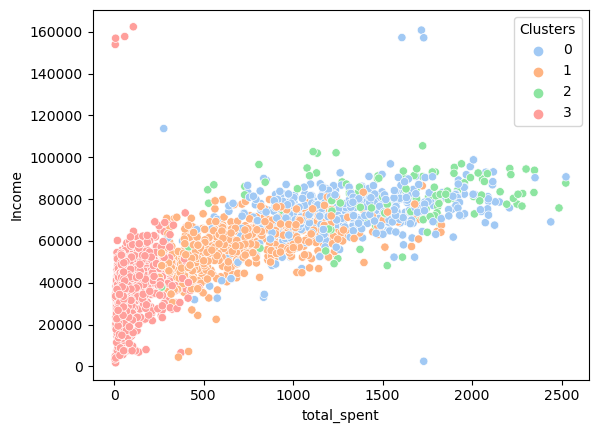

In [28]:
sns.scatterplot(x=data.total_spent, y=data.Income, hue=data.Clusters, data=data,palette='pastel')

<AxesSubplot:xlabel='total_accepted_coupons', ylabel='count'>

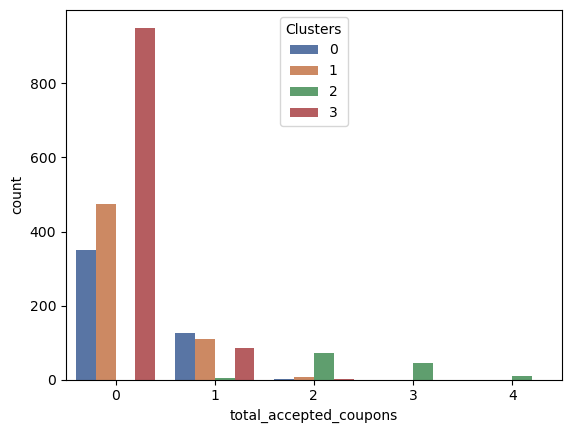

In [29]:
sns.countplot(x=data.total_accepted_coupons, hue=data.Clusters, data=data,palette='deep')

In [30]:
cols=data[['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

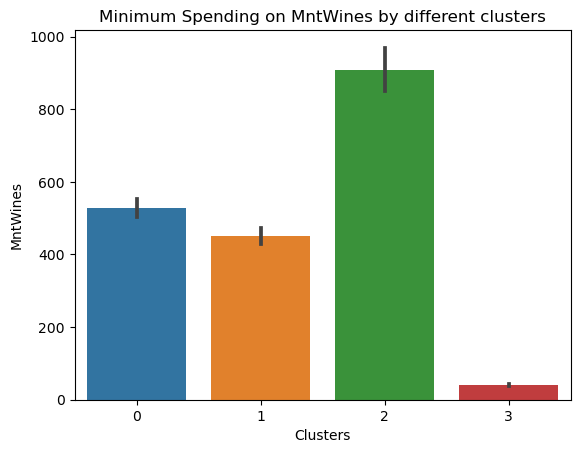

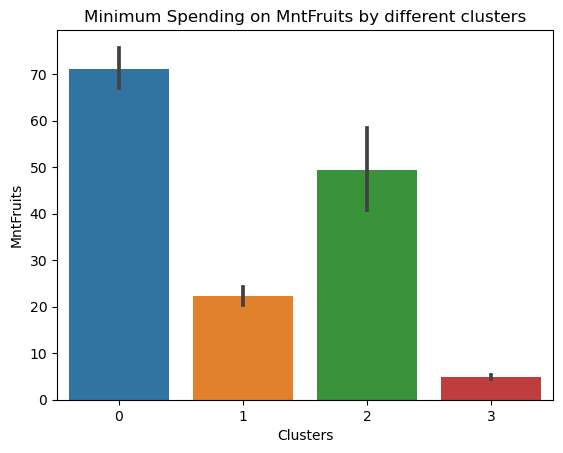

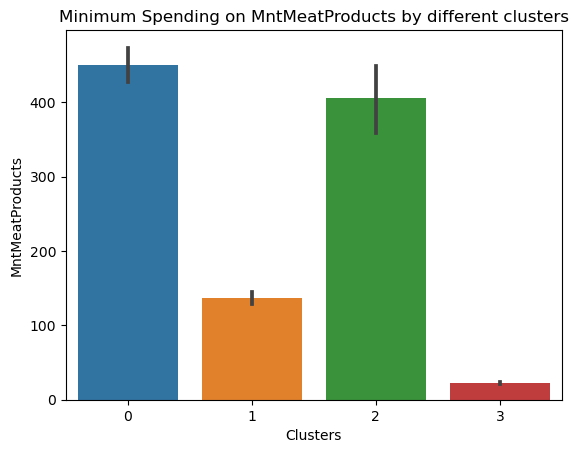

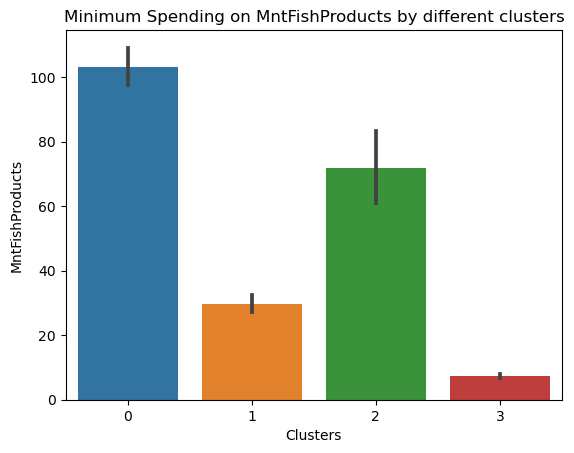

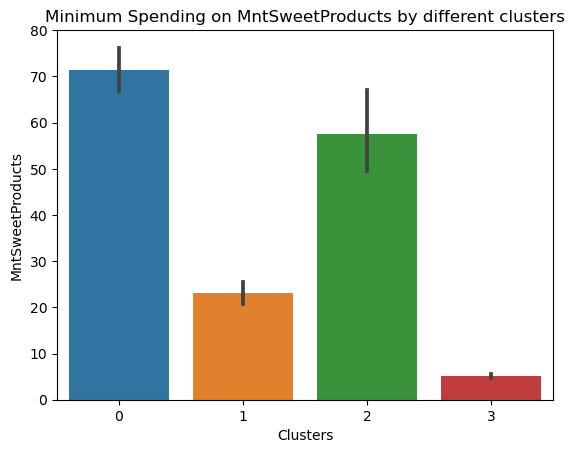

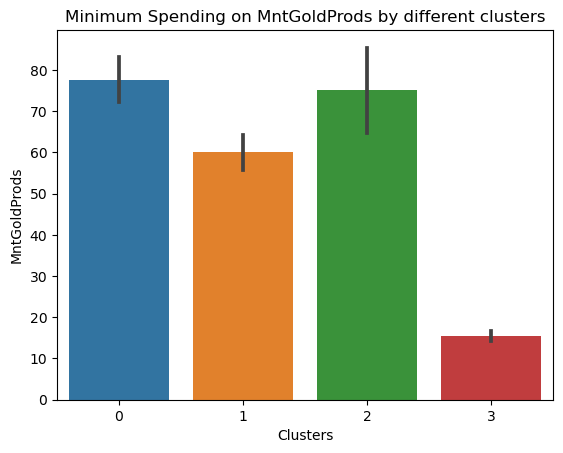

In [31]:
for i in cols:
    plt.subplots()
    sns.barplot(y=data[i], x=data.Clusters, data=data)
    plt.title(f'Minimum Spending on {i} by different clusters')

<AxesSubplot:xlabel='Clusters', ylabel='total_spent'>

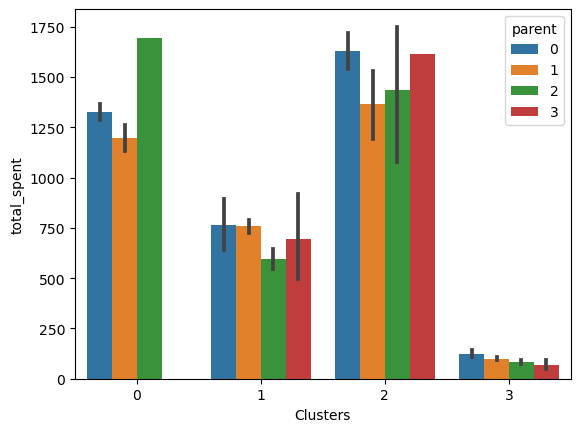

In [37]:
sns.barplot(y=data.total_spent, x=data.Clusters, hue=data.parent, data=data)

In [38]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'total_spent', 'parent',
       'total_accepted_coupons', 'number_of_total_purchases', 'Clusters'],
      dtype='object')

<AxesSubplot:xlabel='Clusters', ylabel='number_of_total_purchases'>

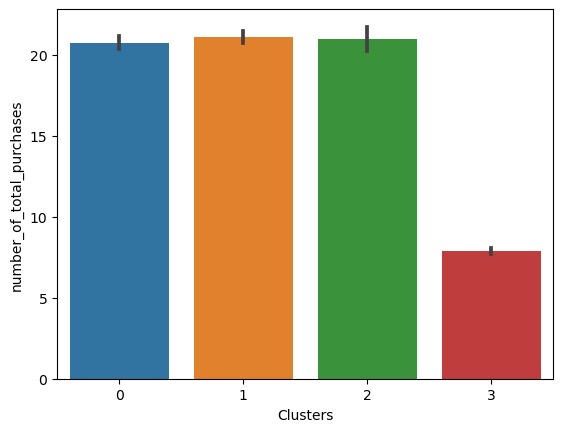

In [40]:
sns.barplot(y=data.number_of_total_purchases, x=data.Clusters, data=data)

<AxesSubplot:xlabel='Clusters', ylabel='Age'>

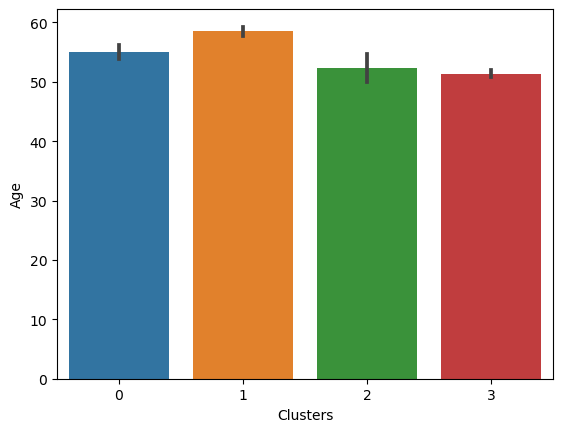

In [49]:
sns.barplot(y=data.Age, x=data.Clusters, data=data)

<AxesSubplot:xlabel='Age', ylabel='Count'>

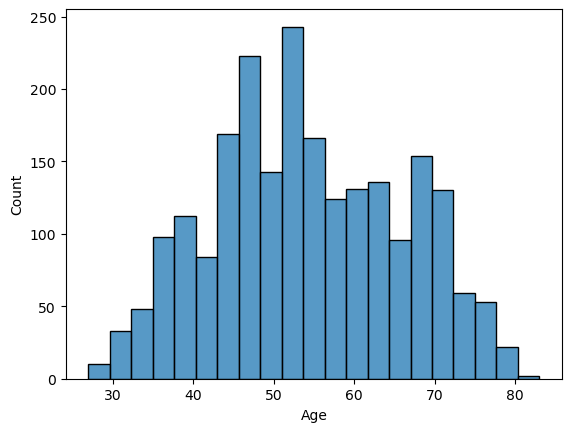

In [47]:
sns.histplot(x=data.Age)

<AxesSubplot:xlabel='Clusters', ylabel='Age'>

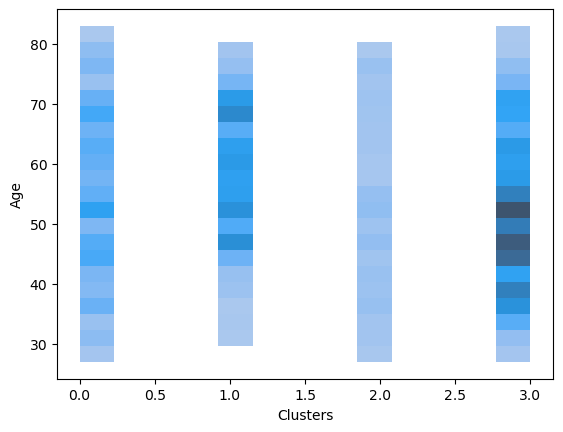

In [51]:
sns.histplot(y=data.Age, x=data.Clusters, data=data,kde=True)